In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (150, 6)

# COMPREHENSIVE DATA ANALYSIS: IRIS DATASET
# TASK 1: LOAD AND EXPLORE THE DATASET
try:
     # Load the Iris dataset
    iris_data = load_iris()
    
    # Create a DataFrame
    df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)
    
    # Also create a time column for line chart (simulated dates)
    dates = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
    df['date'] = dates
    
    print("✅ Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    
    # Display first few rows
    print("\n1. First 5 rows of the dataset:")
    print(df.head(10))
    
    # Explore the structure
    print("\n2. Dataset structure and data types:")
    print("Data types:")
    print(df.dtypes)
    
    print(f"\nDataset Info:")
    print(f"- Number of rows: {len(df)}")
    print(f"- Number of columns: {len(df.columns)}")
    print(f"- Memory usage: {df.memory_usage(deep=True).sum()} bytes")
    
    # Check for missing values
    print("\n3. Missing values check:")
    missing_values = df.isnull().sum()
    print("Missing values per column:")
    for col, missing in missing_values.items():
        print(f"  {col}: {missing}")
    
    if missing_values.sum() == 0:
        print("✅ No missing values found - dataset is clean!")
    else:
        print("⚠️  Missing values detected - cleaning required")
        # Clean missing values (fill with median for numerical, mode for categorical)
        for col in df.columns:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
        print("✅ Missing values cleaned!")

except Exception as e:
    print(f"❌ Error loading dataset: {str(e)}")
    exit()

✅ Dataset loaded successfully!
Dataset shape: (150, 6)

1. First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  species       date  
0  setosa 2023-01-0

In [5]:
# Task 2: Basic Data Analysis
# Basic statistics
print("\n1. Basic statistics of numerical columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe().round(3))

# Group analysis
print("\n2. Grouping analysis by species:")
species_analysis = df.groupby('species')[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].agg({
    'sepal length (cm)': ['mean', 'std'],
    'sepal width (cm)': ['mean', 'std'],
    'petal length (cm)': ['mean', 'std'],
    'petal width (cm)': ['mean', 'std']
}).round(3)

print("Mean and Standard Deviation by Species:")
print(species_analysis)

# Additional insights
print("\n3. Key findings and patterns:")
print("📊 ANALYSIS INSIGHTS:")
print(f"• Total samples: {len(df)}")
print(f"• Number of species: {df['species'].nunique()}")
print(f"• Samples per species: {df['species'].value_counts().to_dict()}")

# Find correlations
correlations = df[numerical_cols[:-1]].corr()
# Unstack, sort, and remove self-correlations for clarity
corr_pairs = correlations.unstack()
# Remove self-correlations (where feature pairs are the same)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
# Drop duplicate pairs (since correlation matrix is symmetric)
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)
strongest_corr_value = corr_pairs.iloc[0]
strongest_corr_pair = corr_pairs.index[0]
print(f"\n• Strongest positive correlation: {strongest_corr_value:.3f}")
print(f"  Between: {strongest_corr_pair}")

print(f"\n• Petal length shows highest variation (std: {df['petal length (cm)'].std():.3f})")
print(f"• Sepal width shows lowest variation (std: {df['sepal width (cm)'].std():.3f})")


1. Basic statistics of numerical columns:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count            150.000           150.000            150.000   
mean               5.843             3.057              3.758   
std                0.828             0.436              1.765   
min                4.300             2.000              1.000   
25%                5.100             2.800              1.600   
50%                5.800             3.000              4.350   
75%                6.400             3.300              5.100   
max                7.900             4.400              6.900   

       petal width (cm)  
count           150.000  
mean              1.199  
std               0.762  
min               0.100  
25%               0.300  
50%               1.300  
75%               1.800  
max               2.500  

2. Grouping analysis by species:
Mean and Standard Deviation by Species:
           sepal length (cm)        sepal width (cm)        pet

🌸 Starting Iris Dataset Comprehensive Analysis...
✅ Dataset loaded: 150 samples, 6 features

📊 Creating visualizations...
✅ Main visualization saved as 'iris_comprehensive_analysis.png'


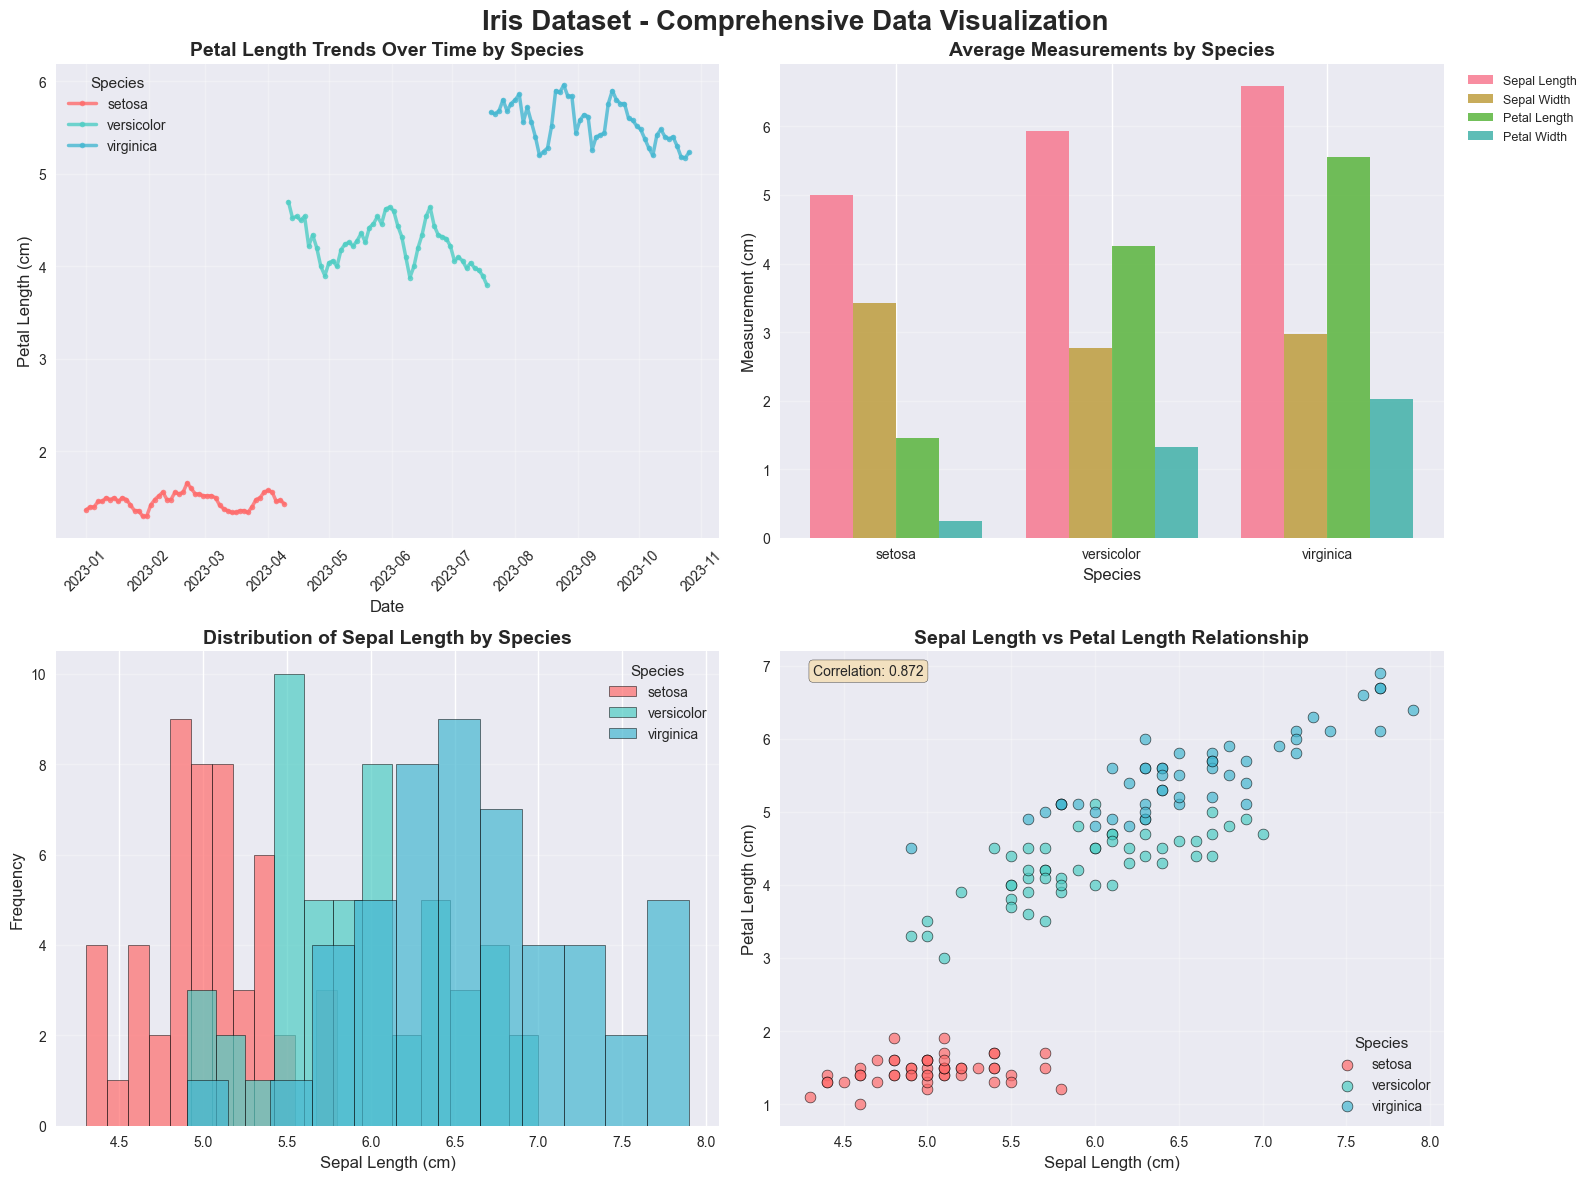


🔥 Creating correlation heatmap...
✅ Correlation heatmap saved as 'iris_correlation_heatmap.png'


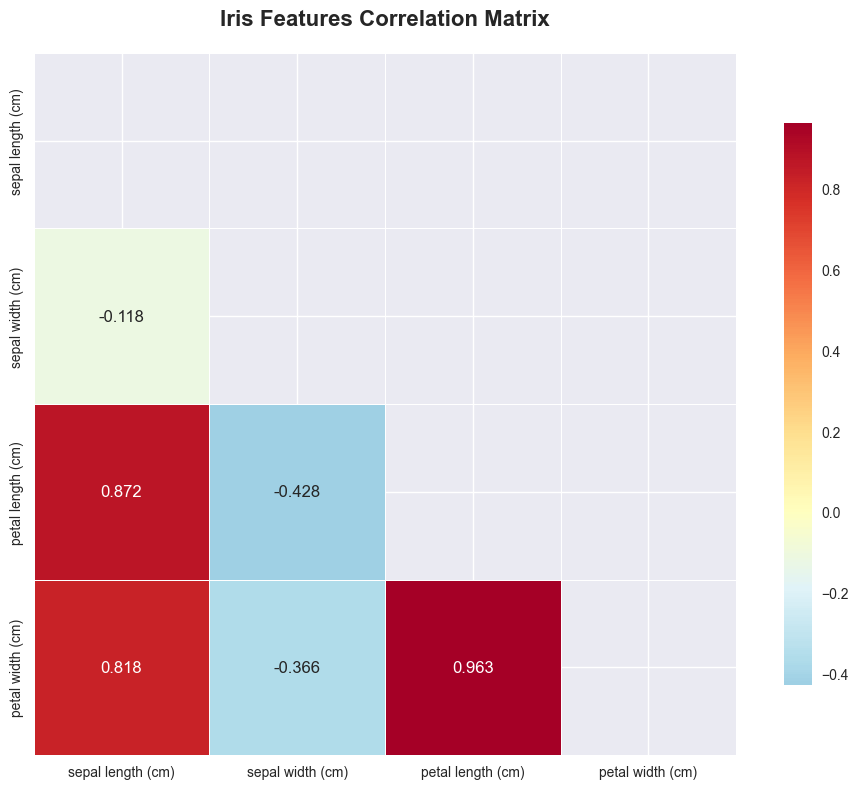

COMPREHENSIVE DATA ANALYSIS INSIGHTS

📊 DATASET OVERVIEW:
• Total samples: 150
• Species count: {'setosa': 50, 'versicolor': 50, 'virginica': 50}
• Features analyzed: 4 numerical measurements
• Data completeness: 100.0%

🔍 KEY STATISTICAL FINDINGS:
1. SPECIES DIFFERENTIATION:
   • Setosa: Avg petal length = 1.46cm, width = 0.25cm
   • Versicolor: Avg petal length = 4.26cm, width = 1.33cm
   • Virginica: Avg petal length = 5.55cm, width = 2.03cm

2. FEATURE RELATIONSHIPS:
   • Strongest correlations:
     1. petal length ↔ petal width: 0.963 (Strong)
     2. sepal length ↔ petal length: 0.872 (Strong)
     3. sepal length ↔ petal width: 0.818 (Strong)

3. DISTRIBUTION CHARACTERISTICS:
   • Sepal Length: Approximately normal (skewness: 0.31)
   • Sepal Width: Approximately normal (skewness: 0.32)
   • Petal Length: Approximately normal (skewness: -0.27)
   • Petal Width: Approximately normal (skewness: -0.10)

4. VARIABILITY ANALYSIS:
   • Most variable species: Setosa (CV: 0.182)
   • M

In [7]:
# TASK 3: VISUALIZATIONS
def load_and_prepare_iris_data():
    """Load the Iris dataset and prepare it with additional features."""
    # Load the Iris dataset
    iris = load_iris()
    
    # Create DataFrame
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = iris.target_names[iris.target]
    
    # Add a synthetic date column for time-series visualization
    # Starting from a base date and adding days for each sample
    base_date = datetime(2023, 1, 1)
    dates = [base_date + timedelta(days=i*2) for i in range(len(df))]
    df['date'] = dates
    
    # Sort by species and date for better rolling average calculation
    df = df.sort_values(['species', 'date']).reset_index(drop=True)
    
    return df

def create_visualizations(df):
    """Create four types of visualizations as required."""
    
    # Set up the figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Iris Dataset - Comprehensive Data Visualization', fontsize=20, fontweight='bold', y=0.98)
    
    # Define colors for consistency
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    species_list = df['species'].unique()
    
    # 1. LINE CHART - Trends over time
    ax1 = axes[0, 0]
    
    # Calculate rolling average for petal length by species
    df['petal_length_rolling'] = df.groupby('species')['petal length (cm)'].transform(
        lambda x: x.rolling(window=5, center=True, min_periods=1).mean()
    )
    
    for i, species in enumerate(species_list):
        species_data = df[df['species'] == species]
        ax1.plot(species_data['date'], species_data['petal_length_rolling'], 
                marker='o', linewidth=2.5, markersize=4, label=species, 
                color=colors[i], alpha=0.8)
    
    ax1.set_title('Petal Length Trends Over Time by Species', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Petal Length (cm)', fontsize=12)
    ax1.legend(title='Species', title_fontsize=11, fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. BAR CHART - Comparison across categories
    ax2 = axes[0, 1]
    
    # Calculate mean measurements by species
    numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    species_means = df.groupby('species')[numerical_cols].mean()
    
    x = np.arange(len(species_list))
    width = 0.2
    
    for i, col in enumerate(numerical_cols):
        ax2.bar(x + i*width, species_means[col], width, 
               label=col.replace(' (cm)', '').title(), alpha=0.8)
    
    ax2.set_title('Average Measurements by Species', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Species', fontsize=12)
    ax2.set_ylabel('Measurement (cm)', fontsize=12)
    ax2.set_xticks(x + width*1.5)
    ax2.set_xticklabels(species_list, rotation=0)
    ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 3. HISTOGRAM - Distribution analysis
    ax3 = axes[1, 0]
    
    for i, species in enumerate(species_list):
        species_data = df[df['species'] == species]['sepal length (cm)']
        ax3.hist(species_data, alpha=0.7, bins=12, label=species, 
                edgecolor='black', linewidth=0.5, color=colors[i])
    
    ax3.set_title('Distribution of Sepal Length by Species', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Sepal Length (cm)', fontsize=12)
    ax3.set_ylabel('Frequency', fontsize=12)
    ax3.legend(title='Species', title_fontsize=11, fontsize=10)
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. SCATTER PLOT - Relationship between variables
    ax4 = axes[1, 1]
    
    for i, species in enumerate(species_list):
        species_data = df[df['species'] == species]
        ax4.scatter(species_data['sepal length (cm)'], species_data['petal length (cm)'], 
                   c=colors[i], label=species, alpha=0.7, s=60, 
                   edgecolors='black', linewidth=0.5)
    
    ax4.set_title('Sepal Length vs Petal Length Relationship', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Sepal Length (cm)', fontsize=12)
    ax4.set_ylabel('Petal Length (cm)', fontsize=12)
    ax4.legend(title='Species', title_fontsize=11, fontsize=10)
    ax4.grid(True, alpha=0.3)
    
    # Add correlation coefficient
    correlation_coef = df['sepal length (cm)'].corr(df['petal length (cm)'])
    ax4.text(0.05, 0.95, f'Correlation: {correlation_coef:.3f}', 
             transform=ax4.transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    
    # Save the main visualization
    try:
        plt.savefig('iris_comprehensive_analysis.png', dpi=300, bbox_inches='tight')
        print("✅ Main visualization saved as 'iris_comprehensive_analysis.png'")
    except Exception as e:
        print(f"⚠️  Could not save main visualization: {e}")
    
    plt.show()
    
    return correlation_coef

def create_correlation_heatmap(df):
    """Create a bonus correlation heatmap."""
    plt.figure(figsize=(10, 8))
    
    # Select numerical columns
    numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    correlation_matrix = df[numerical_cols].corr()
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # Create heatmap
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', 
               center=0, square=True, fmt='.3f', cbar_kws={"shrink": .8},
               linewidths=0.5, annot_kws={'size': 12})
    
    plt.title('Iris Features Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    
    # Save correlation heatmap
    try:
        plt.savefig('iris_correlation_heatmap.png', dpi=300, bbox_inches='tight')
        print("✅ Correlation heatmap saved as 'iris_correlation_heatmap.png'")
    except Exception as e:
        print(f"⚠️  Could not save correlation heatmap: {e}")
    
    plt.show()
    
    return correlation_matrix

def generate_insights(df, correlation_coef):
    """Generate and print comprehensive insights."""
    print("COMPREHENSIVE DATA ANALYSIS INSIGHTS")    
    print("\n📊 DATASET OVERVIEW:")
    print(f"• Total samples: {len(df)}")
    print(f"• Species count: {df['species'].value_counts().to_dict()}")
    print(f"• Features analyzed: 4 numerical measurements")
    print(f"• Data completeness: {(1 - df.isnull().sum().sum() / df.size) * 100:.1f}%")
    
    print("\n🔍 KEY STATISTICAL FINDINGS:")    
    # Species characteristics
    species_stats = df.groupby('species').agg({
        'petal length (cm)': ['mean', 'std'],
        'petal width (cm)': ['mean', 'std'],
        'sepal length (cm)': ['mean', 'std'],
        'sepal width (cm)': ['mean', 'std']
    }).round(2)
    
    print("1. SPECIES DIFFERENTIATION:")
    for species in df['species'].unique():
        petal_length_mean = species_stats.loc[species, ('petal length (cm)', 'mean')]
        petal_width_mean = species_stats.loc[species, ('petal width (cm)', 'mean')]
        print(f"   • {species.capitalize()}: Avg petal length = {petal_length_mean}cm, width = {petal_width_mean}cm")
    
    print("\n2. FEATURE RELATIONSHIPS:")
    numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    corr_matrix = df[numerical_cols].corr()
    
    # Find strongest correlations
    correlations = []
    for i in range(len(numerical_cols)):
        for j in range(i+1, len(numerical_cols)):
            corr_val = corr_matrix.iloc[i, j]
            correlations.append((numerical_cols[i], numerical_cols[j], corr_val))
    
    correlations.sort(key=lambda x: abs(x[2]), reverse=True)
    
    print("   • Strongest correlations:")
    for i, (feat1, feat2, corr_val) in enumerate(correlations[:3]):
        strength = "Strong" if abs(corr_val) > 0.7 else "Moderate" if abs(corr_val) > 0.5 else "Weak"
        feat1_short = feat1.split(' (')[0]
        feat2_short = feat2.split(' (')[0]
        print(f"     {i+1}. {feat1_short} ↔ {feat2_short}: {corr_val:.3f} ({strength})")
    
    print("\n3. DISTRIBUTION CHARACTERISTICS:")
    for col in numerical_cols:
        col_data = df[col]
        skewness = col_data.skew()
        distribution = "Right-skewed" if skewness > 0.5 else "Left-skewed" if skewness < -0.5 else "Approximately normal"
        print(f"   • {col.split(' (')[0].title()}: {distribution} (skewness: {skewness:.2f})")
    
    print("\n4. VARIABILITY ANALYSIS:")
    cv_by_species = {}
    for species in df['species'].unique():
        species_data = df[df['species'] == species]
        cv = (species_data[numerical_cols].std() / species_data[numerical_cols].mean()).mean()
        cv_by_species[species] = cv
    
    most_variable = max(cv_by_species, key=cv_by_species.get)
    least_variable = min(cv_by_species, key=cv_by_species.get)
    
    print(f"   • Most variable species: {most_variable.capitalize()} (CV: {cv_by_species[most_variable]:.3f})")
    print(f"   • Most consistent species: {least_variable.capitalize()} (CV: {cv_by_species[least_variable]:.3f})")
    
    print(f"\n✅ ANALYSIS COMPLETED SUCCESSFULLY!")
    print(f"📈 All required visualizations created and saved")

def main():
    """Main function to run the complete analysis."""
    print("🌸 Starting Iris Dataset Comprehensive Analysis...")    
    # Load and prepare data
    df = load_and_prepare_iris_data()
    print(f"✅ Dataset loaded: {len(df)} samples, {len(df.columns)} features")
    
    # Create main visualizations
    print("\n📊 Creating visualizations...")
    correlation_coef = create_visualizations(df)
    
    # Create bonus heatmap
    print("\n🔥 Creating correlation heatmap...")
    correlation_matrix = create_correlation_heatmap(df)
    
    # Generate insights
    generate_insights(df, correlation_coef)
    
    return df

# Run the analysis
if __name__ == "__main__":
    df_iris = main()